Original link to the tutorial is here:
https://www.kaggle.com/kanncaa1/feature-selection-and-data-visualization

Feature selection in this material with:
1. Correlation 
2. Univariate feature selection
3. Recursive feature elimination
4. Recursive feature elimination with cross validation
5. Tree based feature selection methods 
5. PCA

# Data Analysis


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time
from subprocess import check_output
# man gotta remember using this to get the directories easily
print(check_output(["ls","../Data Science Techniques/"]).decode("utf8"))

Feature Selection and Data Visualization.ipynb
data.csv



In [2]:
data=pd.read_csv("../Data Science Techniques/data.csv")

In [3]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
data.info()
# This is a dataset on breast cancer data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

Looking at the column names, here are the basic obs:
1. ID shouldn't be used to train
2. diagnosis is the label
3. There's a weird column named Unnamed:32 that we can drop

we can drop the ones that we don't really need 


In [5]:
col=data.columns
print(col)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


In [6]:
# Set up the target column
y=data.diagnosis
list=["Unnamed: 32","id",'diagnosis']
x=data.drop(list,axis=1) # Specifying what to drop using the drop function
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


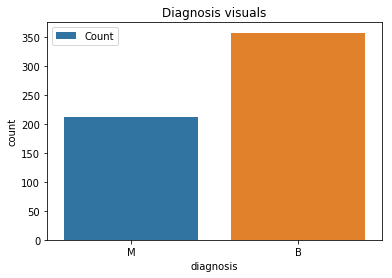

In [7]:
ax=sns.countplot(y,label="Count")
B,M=y.value_counts()
plt.title("Diagnosis visuals")
plt.legend();

In [8]:
y.value_counts()
# B is benign and M is malignant

B    357
M    212
Name: diagnosis, dtype: int64

We have a lot of features but what do they mean?

In [9]:
round(x.describe(),2)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,...,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00
mean,14.13,19.29,91.97,654.89,0.10,0.10,0.09,0.05,0.18,0.06,...,16.27,25.68,107.26,880.58,0.13,0.25,0.27,0.11,0.29,0.08
std,3.52,4.30,24.30,351.91,0.01,0.05,0.08,0.04,0.03,0.01,...,4.83,6.15,33.60,569.36,0.02,0.16,0.21,0.07,0.06,0.02
min,6.98,9.71,43.79,143.50,0.05,0.02,0.00,0.00,0.11,0.05,...,7.93,12.02,50.41,185.20,0.07,0.03,0.00,0.00,0.16,0.06
25%,11.70,16.17,75.17,420.30,0.09,0.06,0.03,0.02,0.16,0.06,...,13.01,21.08,84.11,515.30,0.12,0.15,0.11,0.06,0.25,0.07
50%,13.37,18.84,86.24,551.10,0.10,0.09,0.06,0.03,0.18,0.06,...,14.97,25.41,97.66,686.50,0.13,0.21,0.23,0.10,0.28,0.08
75%,15.78,21.80,104.10,782.70,0.11,0.13,0.13,0.07,0.20,0.07,...,18.79,29.72,125.40,1084.00,0.15,0.34,0.38,0.16,0.32,0.09
max,28.11,39.28,188.50,2501.00,0.16,0.35,0.43,0.20,0.30,0.10,...,36.04,49.54,251.20,4254.00,0.22,1.06,1.25,0.29,0.66,0.21


The one key take-away from looking at this is that the numbers by the columns have different set of spreads. If we want to train anything, we'd need to scale them or standardize them.

# Visualization 
in order to visualize data we are going to use seaborn plots that is not used in other kernels.What I use in real life is mostly violin plot and swarm plot. Do not forget we are not selecting feature, we are trying to know data like looking at the drink list at the pub door.
Before violin and swarm plot we need to normalization or standirdization. Because differences between values of features are very high to observe on plot. I plot features in 3 group and each group includes 10 features to observe better.

### Could use subsetting to visualize the spread of the data better 

In [10]:
# first 10 features 
data_dia=y
data=x
data_n_2=(data-data.mean())/(data.std()) # manual standardization
data=pd.concat([y,data_n_2.iloc[:,0:10]],axis=1)
data=pd.melt(data,id_vars="diagnosis",var_name="features",value_name="value")

In [11]:
data.head()

,diagnosis,features,value
0,M,radius_mean,1.096100
1,M,radius_mean,1.828212
2,M,radius_mean,1.578499
3,M,radius_mean,-0.768233
4,M,radius_mean,1.748758


In [12]:
data.shape

(5690, 3)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

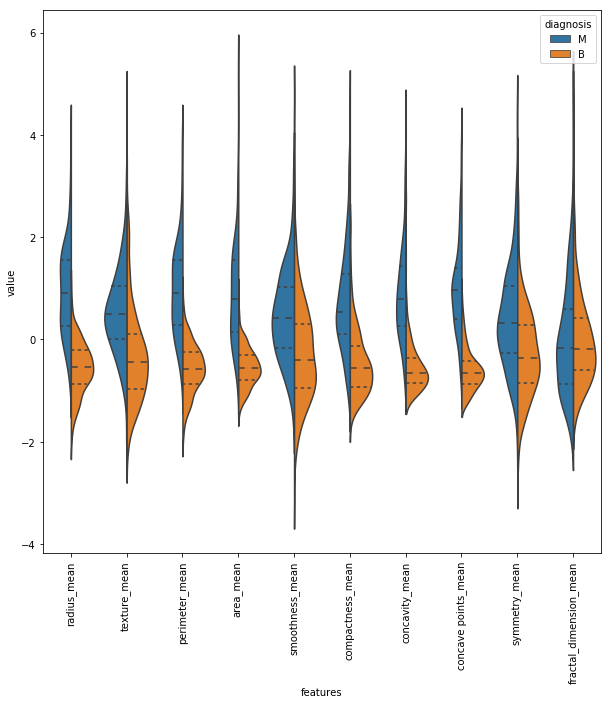

In [13]:
# only after melting the data into the right shape would the visualization make sense
plt.figure(figsize=(10,10))
sns.violinplot(x="features",y="value",hue="diagnosis",data=data,split=True,inner="quart")
# what do split, inner parameters mean? 
# split : bool, optional
# When using hue nesting with a variable that takes two levels, 
# setting split to True will draw half of a violin for each level. 
# This can make it easier to directly compare the distributions.


# inner : {“box”, “quartile”, “point”, “stick”, None}, optional
# Representation of the datapoints in the violin interior. 
# If box, draw a miniature boxplot. If quartiles, 
# draw the quartiles of the distribution. 
# If point or stick, show each underlying datapoint. 
# Using None will draw unadorned violins.
plt.xticks(rotation=90) 

# Sticks show the density plot and it shows how desne the data plots are scattered
# Points are sticks reduced to a single point
# Sticks take a lot longer to draw

# This graph is really useful in displaying the distribution of each var by target variables
# This graph can provide very good intuition of what features are good for and have a high impact on the chart


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

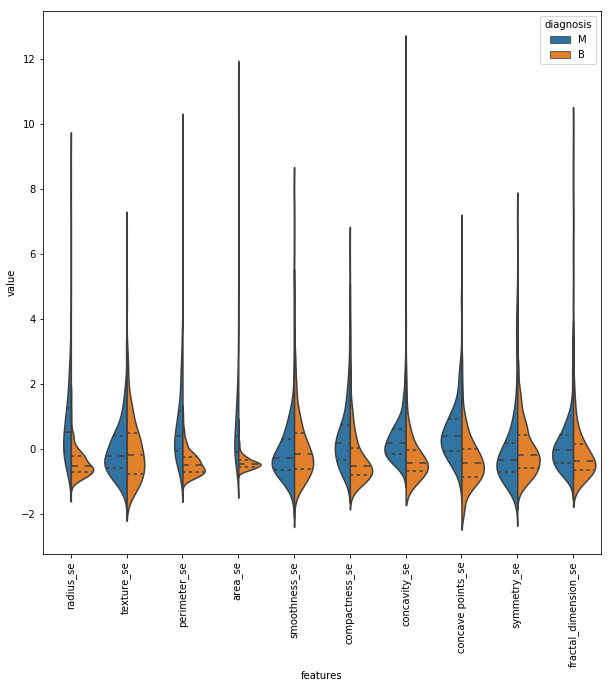

In [14]:
# The next ten features 
data=pd.concat([y,data_n_2.iloc[:,10:20]],axis=1)
data=pd.melt(data,id_vars="diagnosis",
            var_name="features",
            value_name="value")
# specifying the name of the melted table 
# does this matter? Why do we have to melt the table? Is it possible to just graph without melting?
plt.figure(figsize=(10,10))
sns.violinplot(x="features",y="value",hue="diagnosis",data=data,split=True,inner="quart")
# From the way that this function call is defined, seems that melting is very important
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

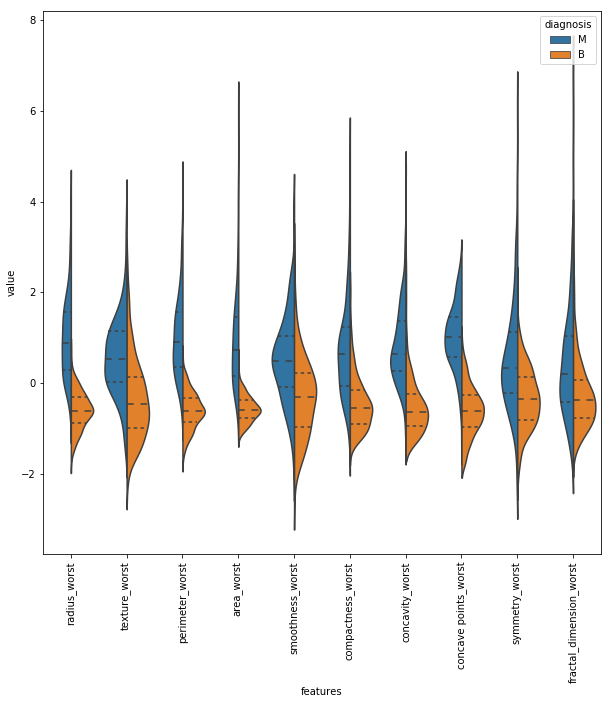

In [16]:
# Applying the same algorithm to analyze 
data=pd.concat([y,data_n_2.iloc[:,20:31]],axis=1)
data=pd.melt(data,id_vars="diagnosis",
             var_name="features",
             value_name="value")
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)